In [52]:
import numpy as np
import imageio
from skimage import io
import matplotlib.pyplot as plt
from scipy.stats import kruskal, normaltest
import dask
import dask.dataframe as dd
import dask.array as da
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


# Metadata univariate EDA

### Data breakdown

In [5]:
df.shape

(33126, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [7]:
df.describe()

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


### Patient data

In [6]:
len(df['patient_id'].unique())

2056

#### Number of images by patient

In [50]:
with pd.option_context('display.max_rows', None):
    print(df['patient_id'].value_counts())

IP_4938382    115
IP_7279968    115
IP_4479736    115
IP_4382720    115
IP_0656529    114
IP_4488328    104
IP_1139701    102
IP_3057277    102
IP_6245507    102
IP_4419570    102
IP_9147454    102
IP_7330399    101
IP_1969685    100
IP_5889408     98
IP_2153088     92
IP_0660290     92
IP_5805281     91
IP_6071452     87
IP_6512345     85
IP_6342052     84
IP_0093378     83
IP_7890415     78
IP_1197949     76
IP_1244021     74
IP_8247808     74
IP_8051701     73
IP_4898383     72
IP_7842431     72
IP_3562983     71
IP_3713422     71
IP_3423256     70
IP_0621614     70
IP_5295861     70
IP_8233849     67
IP_7785592     66
IP_9712836     66
IP_6776978     65
IP_9427625     64
IP_4050705     64
IP_1152723     63
IP_8663649     61
IP_8004532     60
IP_9392784     60
IP_0963996     59
IP_5528290     59
IP_2950485     59
IP_4879325     58
IP_7684360     58
IP_0825081     58
IP_6332843     56
IP_0951571     55
IP_2026598     55
IP_3222187     54
IP_7121757     54
IP_0776416     54
IP_3281766

#### Breakdown of patients by number of images per patient

In [56]:
with pd.option_context('display.max_rows', None):
    print(df['patient_id'].value_counts().value_counts().sort_index(ascending=True))

2        1
3      296
4      188
5      120
6       85
7      102
8       43
9       78
10      46
11      42
12      67
13      67
14      71
15      72
16      41
17      50
18      32
19      46
20      44
21      42
22      43
23      44
24      24
25      30
26      20
27      20
28      19
29      27
30      21
31      11
32      13
33      13
34      20
35      19
36      11
37      15
38      18
39       7
40      11
41       9
42      14
43       4
44       7
45      10
46       4
47       4
48       7
49       3
50       6
51       3
52       8
53       3
54       3
55       2
56       1
58       3
59       3
60       2
61       1
63       1
64       2
65       1
66       2
67       1
70       3
71       2
72       2
73       1
74       2
76       1
78       1
83       1
84       1
85       1
87       1
91       1
92       2
98       1
100      1
101      1
102      5
104      1
114      1
115      4
Name: patient_id, dtype: int64


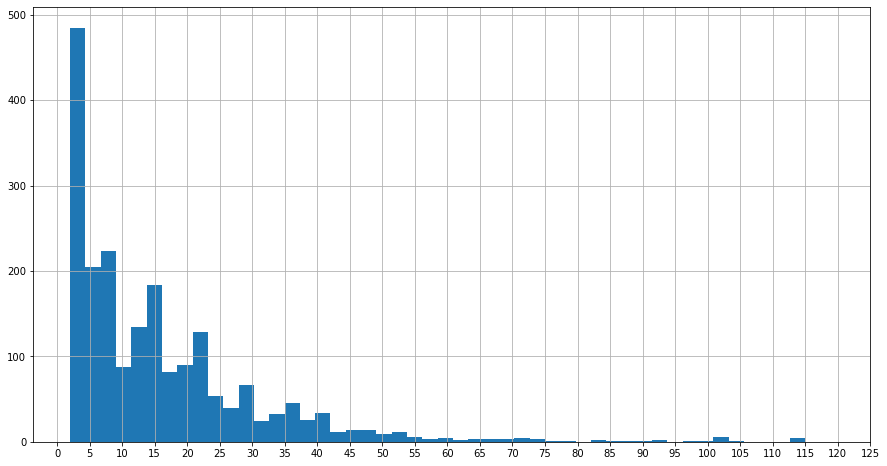

In [18]:
_ = plt.figure(figsize=(15,8))
_ = df['patient_id'].value_counts().hist(bins=48)
_ = plt.xticks(range(0,130,5))

In [9]:
df['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

#### Age

In [63]:
len(df['age_approx'].dropna().unique())

18

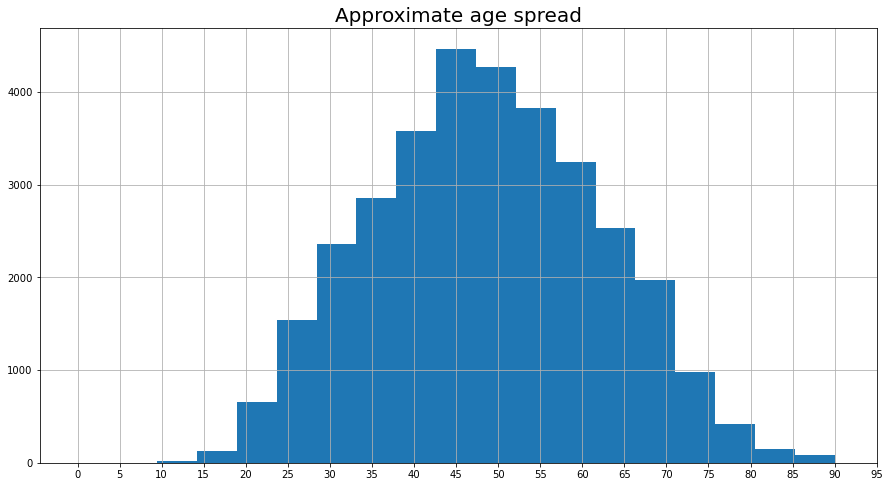

In [60]:
_ = plt.figure(figsize=(15,8))
_= df['age_approx'].hist(bins=18)
_ = plt.xticks(range(0,100,5))
_ = plt.title('Approximate age spread', fontsize=20)

### Image data

#### Spread of location

In [27]:
df['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [12]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [13]:
df['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

In [14]:
df['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

## Conclusions

### Introductory
There are 33,000 images, from 2056 patients. There are a few patients with over 60 images. The vast majority of patients have 25 or fewer images. There appears to be some missing data that will have to be imputed in a further step.

### Patients
The data is relatively evenly split between male and female. It is normally distributed with regard to age, with a slight left skew.

### Images
Most images come from the torso or lower extremity. Very few are in the oral/genital or palm/sole region. 
In comparison of `diagnosis` and `benign_malignant`, the numbers for `melanoma` and `malignant` are the same. It is likely that `malignant` means `melanoma` here. Similarly, `target` contains the same number of `1` values as `benign_malignant` does `malignant`. We will confirm these correlations during multivariate EDA.

While `diagnosis` is indeed interesting, it appears to be irrelevant: The primary objective is to classify melanoma, not other diagnoses. As such, and considering that it is essentially a target variable as well and will not be information available prior to diagnosis in a production situation, we will likely be dropping this from further analysis.

# Metadata multivariate EDA

In [15]:
files = os.listdir('train')

In [16]:
len(files)

33791

In [17]:
test = imageio.imread(f'train/{files[0]}')

DICOM file contained compressed data. Autoconverting with dcmdjpeg (this warning is shown once for each directory)


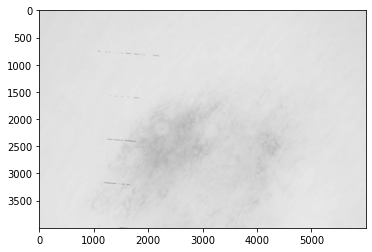

In [18]:
_ = plt.imshow(test, cmap='gray')

In [19]:
type(test)

imageio.core.util.Array

Examination of the `train` directory shows that certain files contain a `.raw` extension. Those files don't exist in the csv, and they are not sized correctly. There are also proper duplicates of each:

We will therefore remove all raw files.

In [20]:
# if {re.search('[raw]', i) for i in os.listdir('train/')} != {None}:
#     print('Purging raw files.')
#     for path in glob.glob('train/*.raw'):
#         os.remove(path)
# else:
#     print('All raw files purged.')

In [21]:
clean_files = os.listdir('train')
len(clean_files) == len(df['image_name'])

False

## Add images to dataframe

In [22]:
df['image_path'] = df['image_name'].apply(lambda x: f'jpeg/train/{x}.jpg')

In [23]:
# Create a list of image paths
images_list = df['image_path'].values
images_indices = range(len(images_list)) # For dataframe columns

# Create array of raveled images
da_images = da.asarray(imageio.imread(images_list))
da_images = da.ravel(da_images)

# Create dataframe of image values
delayed_

array(['jpeg/train/ISIC_2637011.jpg', 'jpeg/train/ISIC_0015719.jpg',
       'jpeg/train/ISIC_0052212.jpg', ..., 'jpeg/train/ISIC_9999515.jpg',
       'jpeg/train/ISIC_9999666.jpg', 'jpeg/train/ISIC_9999806.jpg'],
      dtype=object)

In [24]:
ddf = dd.from_pandas(df, npartitions=100)

delayed_imread = dask.delayed(imageio.imread)
ddf_images['image'] = ddf['image_path'].apply(delayed_imread, meta=('image',np.uint8))

## Extract sample

In [25]:
sample = ddf.partitions[1]
sample = sample.compute()

In [26]:
sample.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,image_path,image
332,ISIC_0214186,IP_0232771,male,75.0,torso,unknown,benign,0,jpeg/train/ISIC_0214186.jpg,"[[[182, 139, 123], [182, 139, 123], [183, 140,..."
333,ISIC_0214335,IP_0825081,male,80.0,head/neck,unknown,benign,0,jpeg/train/ISIC_0214335.jpg,"[[[22, 14, 12], [23, 15, 13], [24, 16, 14], [2..."
334,ISIC_0214635,IP_6601134,female,55.0,upper extremity,unknown,benign,0,jpeg/train/ISIC_0214635.jpg,"[[[167, 115, 119], [168, 116, 120], [168, 116,..."
335,ISIC_0214903,IP_3789216,male,50.0,torso,nevus,benign,0,jpeg/train/ISIC_0214903.jpg,"[[[187, 115, 127], [189, 117, 129], [191, 119,..."
336,ISIC_0215054,IP_8091497,male,45.0,head/neck,unknown,benign,0,jpeg/train/ISIC_0215054.jpg,"[[[18, 18, 16], [18, 18, 16], [18, 18, 16], [1..."


In [27]:
MB = 1024
sample.memory_usage().sum()/MB

26.06640625

In [28]:
sample.shape

(332, 10)

In [29]:
len(sample['patient_id'].unique())

290

In [39]:
for image in sample['image'].index:
    for i in range(len(sample['image'][332])):
        ddf.loc[image, str(i)] = sample.loc[image,'image'][i]

ValueError: Must have equal len keys and value when setting with an ndarray

### Image EDA

I would like to see if benign and malignant images share a common spread of image intensities. To do so, I will perform a Kruskal H-test (see below for confirmation of nonparametric data, thus necessitating a nonparametric alternative to ANOVA). The Kruskal test will examine both standard deviation and mean of the images. A significant test statistic would suggest a straightforward method of classification for melanomas.

In [29]:
benign = sample['benign_malignant'] == 'benign'
malignant = sample['benign_malignant'] == 'malignant'
sample['benign_malignant'].value_counts()

benign       323
malignant      9
Name: benign_malignant, dtype: int64

In [30]:
sample['image_std'] = sample['image'].apply(lambda x: x.std())
sample['image_mean'] = sample['image'].apply(lambda x: x.mean())

In [31]:
normaltest(sample.loc[benign, 'image_std'])

NormaltestResult(statistic=17.172282666972205, pvalue=0.00018667501634459289)

In [32]:
kruskal(sample.loc[benign, 'image_std'], sample.loc[malignant, 'image_std'])

KruskalResult(statistic=0.0047136920201182875, pvalue=0.9452631775968527)

In [33]:
kruskal(sample.loc[benign, 'image_mean'], sample.loc[malignant, 'image_std'])

KruskalResult(statistic=26.189189189189165, pvalue=3.0955067058454613e-07)

The results of these values present a more complicated picture than a simple analysis of variances might provide. Pattern matching will likely be necessary in the form of a deep neural net.